In [19]:
#Testing column: He/H
#Bulge vs Thin Disc
#Number of data points - Bulge: 465, Thin Disc: 1202
#Mean1: -0.6727, Std1: 0.4242
#Mean2: -0.6454, Std2: 0.3877
#KS Test İstatistiği: 0.0338
#P Değeri: 0.8643
        
import numpy as np
from scipy import stats

# Örnek veri setleri
data1 = np.random.normal(-0.6727, 0.4242, 465)  # Ortalama -0.6727, standart sapma 0.4242
data2 = np.random.normal(-0.6454, 0.3877, 1202)  # Ortalama -0.6454, standart sapma 0.3877

# Kolmogorov-Smirnov Testi
ks_statistic, ks_p_value = stats.ks_2samp(data1, data2)
print(f"KS Test İstatistiği: {ks_statistic}")
print(f"KS P Değeri: {ks_p_value}")

if ks_p_value < 0.05:
    print("Veri setleri arasında istatistiksel olarak anlamlı bir fark vardır (KS Testi).")
else:
    print("Veri setleri arasında istatistiksel olarak anlamlı bir fark yoktur (KS Testi).")


KS Test İstatistiği: 0.09933980999409586
KS P Değeri: 0.0024482397404233434
Veri setleri arasında istatistiksel olarak anlamlı bir fark vardır (KS Testi).


In [ ]:
import numpy as np
from scipy import stats

# Örnek veri setleri
data1 = np.random.normal(loc=-0.6727, scale=0.4242, size=465)  # Ortalama 0, standart sapma 1 olan normal dağılımdan 1000 veri
data2 = np.random.normal(loc=-0.6454, scale=0.3877, size=1202)  # Ortalama 0, standart sapma 1 olan normal dağılımdan 1000 veri

# Kolmogorov-Smirnov Testi
ks_statistic, ks_p_value = stats.ks_2samp(data1, data2)
print(f"KS Test İstatistiği: {ks_statistic}")
print(f"KS P Değeri: {ks_p_value}")

if ks_p_value < 0.05:
    print("Veri setleri arasında istatistiksel olarak anlamlı bir fark vardır (KS Testi).")
else:
    print("Veri setleri arasında istatistiksel olarak anlamlı bir fark yoktur (KS Testi).")


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Excel dosyasını oku
df = pd.read_excel('/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx',
                   sheet_name='Sayfa3')

# Hesaplanacak element sütunları
columns_to_test = ['He/H', 'N/H', 'O/H', 'Ne/H', 'Ar/H', 'S/H', 'Cl/H']

# Gbileşen'e göre veri filtreleme
component_filters = {
    'Bulge': df[df['Gbileşen'] == 'Bulge'],
    'Thin Disc': df[df['Gbileşen'] == 'Thin Disc'],
    'Thick Disk': df[df['Gbileşen'] == 'Thick Disk'],
    'Halo': df[df['Gbileşen'] == 'Halo'],
    'no distance': df[df['Gbileşen'] == 'no distance']
}

# Karşılaştırma çiftleri
comparison_pairs = [
    ('Bulge', 'Thin Disc'),
    ('Bulge', 'Thick Disk'),
    ('Bulge', 'Halo'),
    ('Bulge', 'no distance'),
    ('Thin Disc', 'Thick Disk'),
    ('Thin Disc', 'Halo'),
    ('Thin Disc', 'no distance'),
    ('Thick Disk', 'Halo'),
    ('Thick Disk', 'no distance'),
    ('Halo', 'no distance')
]

# Sonuçları saklayacak sözlük
results = {col: [] for col in columns_to_test}

# Test fonksiyonu
def perform_tests(values1, values2):
    # Boş değerleri kaldır
    values1 = values1.dropna()
    values2 = values2.dropna()
    
    # Ortalama ve standart sapma hesaplama
    mean1 = values1.mean()
    std1 = values1.std()
    mean2 = values2.mean()
    std2 = values2.std()
    
    if len(values1) > 0 and len(values2) > 0:
        ks_statistic, ks_p_value = stats.ks_2samp(values1, values2)
        if len(values1) == len(values2):
            wilcoxon_statistic, wilcoxon_p_value = stats.wilcoxon(values1, values2)
        else:
            wilcoxon_statistic, wilcoxon_p_value = (np.nan, np.nan)  # Farklı boyutlu veri setleri için
    else:
        ks_statistic, ks_p_value, wilcoxon_statistic, wilcoxon_p_value = (np.nan, np.nan, np.nan, np.nan)

    return (mean1, std1, mean2, std2, ks_statistic, ks_p_value, wilcoxon_statistic, wilcoxon_p_value)

# Tüm sütunlar için testleri yap
for col in columns_to_test:
    for pair in comparison_pairs:
        values1 = component_filters[pair[0]][col]
        values2 = component_filters[pair[1]][col]
        mean1, std1, mean2, std2, ks_statistic, ks_p_value, wilcoxon_statistic, wilcoxon_p_value = perform_tests(values1, values2)
        results[col].append(
            f"Mean1: {mean1:.4f}, Std1: {std1:.4f}, Mean2: {mean2:.4f}, Std2: {std2:.4f}, "
            f"KS Stat: {ks_statistic:.4f}, KS P: {ks_p_value:.4f}, Wilcoxon Stat: {wilcoxon_statistic:.4f}, Wilcoxon P: {wilcoxon_p_value:.4f}"
        )

# Sonuçları tablo halinde bir txt dosyasına yazdır
with open('/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/test_results.txt', 'w') as f:
    # Başlık satırı
    header = "Karşılaştırmalar\t" + "\t".join(columns_to_test) + "\n"
    f.write(header)

    # Her karşılaştırma için satırları yaz
    for i, pair in enumerate(comparison_pairs):
        row = f"{pair[0]} vs {pair[1]}\t"
        row += "\t".join([results[col][i] for col in columns_to_test]) + "\n"
        f.write(row)

print("Test sonuçları 'test_results.txt' dosyasına yazıldı.")


In [9]:
import pandas as pd
import numpy as np
from scipy import stats

# Excel dosyasını oku
df = pd.read_excel('/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx',
                   sheet_name='Sayfa3')

# Hesaplanacak element sütunları
columns_to_test = ['He/H', 'N/H', 'O/H', 'Ne/H', 'Ar/H', 'S/H', 'Cl/H']

# Gbileşen'e göre veri filtreleme
component_filters = {
    'Bulge': df[df['Gbileşen'] == 'Bulge'],
    'Thin Disc': df[df['Gbileşen'] == 'Thin Disc'],
    'Thick Disk': df[df['Gbileşen'] == 'Thick Disk'],
    'Halo': df[df['Gbileşen'] == 'Halo'],
    'no distance': df[df['Gbileşen'] == 'no distance']
}

# Karşılaştırma çiftleri
comparison_pairs = [
    ('Bulge', 'Thin Disc'),
    ('Bulge', 'Thick Disk'),
    ('Bulge', 'Halo'),
    ('Bulge', 'no distance'),
    ('Thin Disc', 'Thick Disk'),
    ('Thin Disc', 'Halo'),
    ('Thin Disc', 'no distance'),
    ('Thick Disk', 'Halo'),
    ('Thick Disk', 'no distance'),
    ('Halo', 'no distance')
]

# Test fonksiyonu
def perform_ks_test(values1, values2):
    # Boş değerleri kaldır
    values1 = values1.dropna()
    values2 = values2.dropna()
    
    if len(values1) > 0 and len(values2) > 0:
        ks_statistic, ks_p_value = stats.ks_2samp(values1, values2)
    else:
        ks_statistic, ks_p_value = (np.nan, np.nan)
    
    return ks_statistic, ks_p_value

# Tüm sütunlar için testleri yap
for col in columns_to_test:
    print(f"Testing column: {col}")
    for pair in comparison_pairs:
        values1 = component_filters[pair[0]][col]
        values2 = component_filters[pair[1]][col]

        mean1 = values1.mean()
        std1 = values1.std()
        mean2 = values2.mean()
        std2 = values2.std()

        ks_statistic, ks_p_value = perform_ks_test(values1, values2)

        print(f"{pair[0]} vs {pair[1]}")
        print(f"Number of data points - {pair[0]}: {len(values1)}, {pair[1]}: {len(values2)}")
        print(f"Mean1: {mean1:.4f}, Std1: {std1:.4f}")
        print(f"Mean2: {mean2:.4f}, Std2: {std2:.4f}")
        print(f"KS Test İstatistiği: {ks_statistic:.4f}")
        print(f"P Değeri: {ks_p_value:.4e}")  # Bilimsel formatta yazdırma
        print("-" * 40)
        
#for col in columns_to_test:
#    print(f"Testing column: {col}")
#    for pair in comparison_pairs:
#        values1 = component_filters[pair[0]][col]
#        values2 = component_filters[pair[1]][col]
#
#       mean1 = values1.mean()
#        std1 = values1.std()
 #       mean2 = values2.mean()
  #      std2 = values2.std()
#
 #       ks_statistic, ks_p_value = perform_ks_test(values1, values2)
#
 #       if ks_p_value < 0.05:
 #           bold_start = "\033[1m"
  #          bold_end = "\033[0m"
   #         print(f"{bold_start}{pair[0]} vs {pair[1]}{bold_end}")
    #        print(f"{bold_start}Number of data points - {pair[0]}: {len(values1)}, {pair[1]}: {len(values2)}{bold_end}")
     #       print(f"{bold_start}Mean1: {mean1:.4f}, Std1: {std1:.4f}{bold_end}")
     #       print(f"{bold_start}Mean2: {mean2:.4f}, Std2: {std2:.4f}{bold_end}")
      #      print(f"{bold_start}KS Test İstatistiği: {ks_statistic:.4f}{bold_end}")
       #     print(f"{bold_start}P Değeri: {ks_p_value:.4e}{bold_end}")
        #    print("-" * 40)


Testing column: He/H
Bulge vs Thin Disc
Number of data points - Bulge: 465, Thin Disc: 1202
Mean1: -0.6727, Std1: 0.4242
Mean2: -0.6454, Std2: 0.3877
KS Test İstatistiği: 0.0338
P Değeri: 8.6427e-01
----------------------------------------
Bulge vs Thick Disk
Number of data points - Bulge: 465, Thick Disk: 527
Mean1: -0.6727, Std1: 0.4242
Mean2: -0.7170, Std2: 0.3774
KS Test İstatistiği: 0.1412
P Değeri: 1.9791e-04
----------------------------------------
Bulge vs Halo
Number of data points - Bulge: 465, Halo: 115
Mean1: -0.6727, Std1: 0.4242
Mean2: -0.8220, Std2: 0.3943
KS Test İstatistiği: 0.3585
P Değeri: 1.7585e-10
----------------------------------------
Bulge vs no distance
Number of data points - Bulge: 465, no distance: 318
Mean1: -0.6727, Std1: 0.4242
Mean2: -0.6160, Std2: 0.3938
KS Test İstatistiği: 0.0681
P Değeri: 3.9207e-01
----------------------------------------
Thin Disc vs Thick Disk
Number of data points - Thin Disc: 1202, Thick Disk: 527
Mean1: -0.6454, Std1: 0.3877


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Excel dosyasını oku
df = pd.read_excel('/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx',
                   sheet_name='Sayfa3')

# Hesaplanacak element sütunları
columns_to_test = ['He/H', 'N/H', 'O/H', 'Ne/H', 'Ar/H', 'S/H', 'Cl/H']

# Gbileşen'e göre veri filtreleme
component_filters = {
    'Bulge': df[df['Gbileşen'] == 'Bulge'],
    'Thin Disc': df[df['Gbileşen'] == 'Thin Disc'],
    'Thick Disk': df[df['Gbileşen'] == 'Thick Disk'],
    'Halo': df[df['Gbileşen'] == 'Halo'],
    'no distance': df[df['Gbileşen'] == 'no distance']
}

# Karşılaştırma çiftleri
comparison_pairs = [
    ('Bulge', 'Thin Disc'),
    ('Bulge', 'Thick Disk'),
    ('Bulge', 'Halo'),
    ('Bulge', 'no distance'),
    ('Thin Disc', 'Thick Disk'),
    ('Thin Disc', 'Halo'),
    ('Thin Disc', 'no distance'),
    ('Thick Disk', 'Halo'),
    ('Thick Disk', 'no distance'),
    ('Halo', 'no distance')
]

# Test fonksiyonu
def perform_ks_test(values1, values2):
    # Boş değerleri kaldır
    values1 = values1.dropna()
    values2 = values2.dropna()
    
    if len(values1) > 0 and len(values2) > 0:
        ks_statistic, ks_p_value = stats.ks_2samp(values1, values2)
    else:
        ks_statistic, ks_p_value = (np.nan, np.nan)
    
    return ks_statistic, ks_p_value

# Tüm sütunlar için testleri yap
for col in columns_to_test:
    print(f"Testing column: {col}")
    for pair in comparison_pairs:
        values1 = component_filters[pair[0]][col]
        values2 = component_filters[pair[1]][col]
        ks_statistic, ks_p_value = perform_ks_test(values1, values2)
        print(f"{pair[0]} vs {pair[1]}")
        print(f"KS Stat: {ks_statistic:.4f}, KS P: {ks_p_value:.4f}")
        print("-" * 40)

print("KS test sonuçları ekrana yazdırıldı.")


In [ ]:
import pandas as pd
from scipy.stats import ks_2samp

d1 = np.random.normal(-0.6727, 0.4242, 465)  # Ortalama -0.6727, standart sapma 0.4242
d2 = np.random.normal(-0.6454, 0.3877, 1202)  # Ortalama -0.6454, standart sapma 0.3877
test = ks_2samp(d1,d2)
print(test)

In [12]:
import pandas as pd
import numpy as np
from scipy import stats

# Excel dosyasını oku
df = pd.read_excel('/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx',
                   sheet_name='Sayfa3')

# Hesaplanacak element sütunları
columns_to_test = ['He/H', 'N/H', 'O/H', 'Ne/H', 'Ar/H', 'S/H', 'Cl/H']

# Gbileşen'e göre veri filtreleme
component_filters = {
    'Bulge': df[df['Gbileşen'] == 'Bulge'],
    'Thin Disc': df[df['Gbileşen'] == 'Thin Disc'],
    'Thick Disk': df[df['Gbileşen'] == 'Thick Disk'],
    'Halo': df[df['Gbileşen'] == 'Halo'],
    'no distance': df[df['Gbileşen'] == 'no distance']
}

# Karşılaştırma çiftleri
comparison_pairs = [
    ('Bulge', 'Thin Disc'),
    ('Bulge', 'Thick Disk'),
    ('Bulge', 'Halo'),
    ('Bulge', 'no distance'),
    ('Thin Disc', 'Thick Disk'),
    ('Thin Disc', 'Halo'),
    ('Thin Disc', 'no distance'),
    ('Thick Disk', 'Halo'),
    ('Thick Disk', 'no distance'),
    ('Halo', 'no distance')
]

# Test fonksiyonu
def perform_ks_test(values1, values2):
    # Boş değerleri kaldır
    values1 = values1.dropna()
    values2 = values2.dropna()
    
    if len(values1) > 0 and len(values2) > 0:
        ks_statistic, ks_p_value = stats.ks_2samp(values1, values2)
    else:
        ks_statistic, ks_p_value = (np.nan, np.nan)
    
    return ks_statistic, ks_p_value

# Sonuçları saklamak için bir DataFrame oluştur
results_df = pd.DataFrame(index=[f'{pair[0]} vs {pair[1]}' for pair in comparison_pairs],
                          columns=columns_to_test)

# Tüm sütunlar için testleri yap ve sonuçları DataFrame'e ekle
for col in columns_to_test:
    for pair in comparison_pairs:
        values1 = component_filters[pair[0]][col]
        values2 = component_filters[pair[1]][col]

        ks_statistic, ks_p_value = perform_ks_test(values1, values2)
        
        # KS test sonucu (istatistik ve p-değeri) tabloya ekleniyor
        results_df.loc[f'{pair[0]} vs {pair[1]}', col] = f'Stat: {ks_statistic:.4f}, P-val: {ks_p_value:.4e}'

# Sonuçları dosyaya yazma (sekme ile ayrılmış)
output_file = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/ks_test_results_table.txt'
results_df.to_csv(output_file, sep='\t', index=True)

print(f"Sonuçlar başarıyla {output_file} dosyasına tablo formatında kaydedildi.")


Sonuçlar başarıyla /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/ks_test_results_table.txt dosyasına tablo formatında kaydedildi.


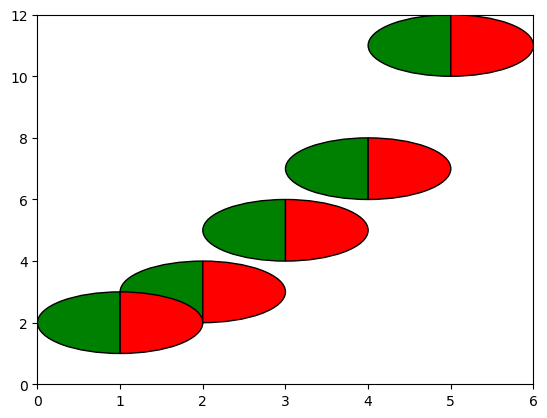

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Wedge

# Örnek veriler
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 11])

# Noktaların boyutu
size = 100
radius = np.sqrt(size) / 10

# Bir scatter plot oluşturma
fig, ax = plt.subplots()

for (xi, yi) in zip(x, y):
    # Yeşil yarım daire çizimi
    wedge1 = Wedge((xi, yi), radius, 90, 270, facecolor='green', edgecolor='black', linewidth=1, zorder=2)
    # Kırmızı yarım daire çizimi
    wedge2 = Wedge((xi, yi), radius, 270, 90, facecolor='red', edgecolor='black', linewidth=1, zorder=3)
    
    # Patch ekleme
    ax.add_patch(wedge1)
    ax.add_patch(wedge2)

# Eksen ayarları
ax.set_xlim(0, 6)
ax.set_ylim(0, 12)

# Grafiği gösterme
plt.show()